In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('tripadvisor_review.csv')

In [6]:
data.head(2)

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32


In [16]:
data1=data.rename(columns={"Category 1": "art galleries","Category 2": "dance clubs","Category 3": "juice bars","Category 4": "restaurants","Category 5": "museums","Category 6": "resorts","Category 7": "parks/picnic spots","Category 8": " beaches","Category 9": "theaters","Category 10": "religious institutions"})



In [17]:
data1.head()

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
User ID                   980 non-null object
art galleries             980 non-null float64
dance clubs               980 non-null float64
juice bars                980 non-null float64
restaurants               980 non-null float64
museums                   980 non-null float64
resorts                   980 non-null float64
parks/picnic spots        980 non-null float64
 beaches                  980 non-null float64
theaters                  980 non-null float64
religious institutions    980 non-null float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [19]:
data1.describe()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [20]:
round(100*(data1.isnull().sum()/len(data1.index)), 2)

User ID                   0.0
art galleries             0.0
dance clubs               0.0
juice bars                0.0
restaurants               0.0
museums                   0.0
resorts                   0.0
parks/picnic spots        0.0
 beaches                  0.0
theaters                  0.0
religious institutions    0.0
dtype: float64

In [21]:
data1.columns

Index(['User ID', 'art galleries', 'dance clubs', 'juice bars', 'restaurants',
       'museums', 'resorts', 'parks/picnic spots', ' beaches', 'theaters',
       'religious institutions'],
      dtype='object')

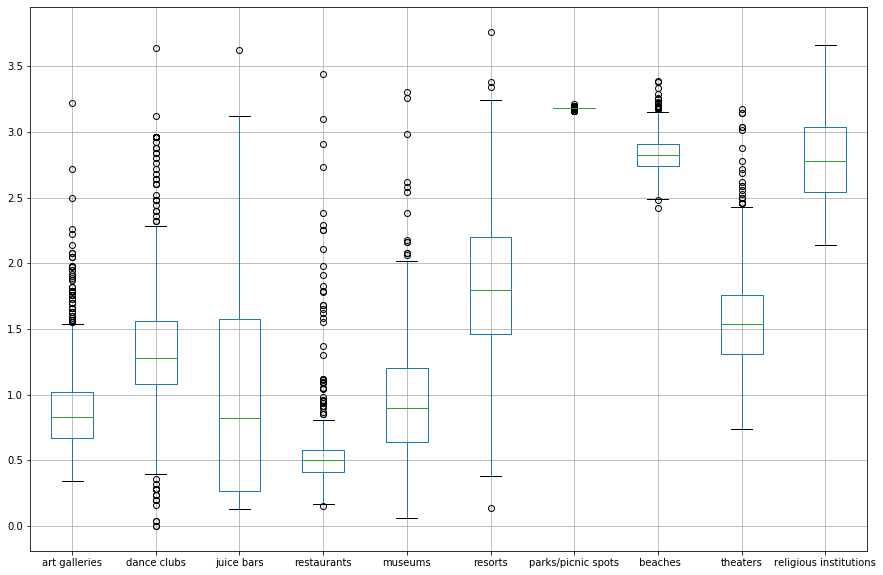

In [22]:
data1.boxplot(figsize=(15,10))

In [25]:
from scipy import stats

z = np.abs(stats.zscore(data1[['art galleries', 'dance clubs', 'juice bars', 'restaurants','museums', 'resorts', 'parks/picnic spots', ' beaches', 'theaters','religious institutions']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))

[[0.11264465 0.93588703 1.6197497  ... 0.32787224 0.68751758 1.18059095]
 [0.38808847 1.77264397 2.08917107 ... 1.49205628 0.797274   1.49190812]
 [1.00018585 1.15600533 0.60048651 ... 0.25511074 0.71187679 0.93153721]
 ...
 [0.86671115 0.06822131 0.43555468 ... 0.18234924 0.62955947 0.68731207]
 [0.11264465 2.41114075 1.12065614 ... 1.05459631 1.23321978 1.05606408]
 [0.11264465 1.6580595  0.14805027 ... 0.25421978 0.62955947 1.24285439]]


*******************************************************************************


Below are the outlier points along with the respective column numbers in the second array


(array([  1,  11,  25,  48,  52,  61,  75,  80,  82,  84,  88,  99, 123,
       145, 157, 171, 180, 199, 226, 228, 234, 239, 239, 242, 247, 257,
       258, 274, 286, 287, 293, 307, 322, 330, 358, 372, 377, 408, 422,
       422, 425, 437, 446, 467, 470, 479, 483, 487, 501, 505, 507, 508,
       536, 545, 592, 599, 601, 608, 612, 613, 629, 631, 641, 666, 666,
       677, 694, 70

In [26]:
# Removing the outliers

data_outliers_removed = data1[(z<3).all(axis=1)]

In [27]:
data1.shape

(980, 11)

In [28]:
data_outliers_removed.shape

(900, 11)

In [29]:
data_outliers_removed.head()

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66


In [30]:
X = data_outliers_removed.drop('User ID',axis =1)  
y = data_outliers_removed['User ID']

In [31]:
X.shape 

(900, 10)

In [32]:
y.shape

(900,)

# PCA

In [33]:
X.head()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66


In [34]:
y.head()

0    User 1
2    User 3
3    User 4
4    User 5
5    User 6
Name: User ID, dtype: object

In [35]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_scaled = scaler.fit_transform(X)

In [40]:
X_scaled[:5,:5]

array([[ 0.20277907,  1.19574193,  1.60602725,  0.8667671 , -0.30519547],
       [ 1.23446209, -1.27502613, -0.62003159,  0.22371769, -1.70609272],
       [-1.50483419,  1.19574193, -0.93803999,  0.50951742, -1.15574023],
       [-1.29138253, -0.28671891,  0.19406993,  0.50951742,  1.54599018],
       [ 0.41623073, -0.08905746, -0.39106554, -1.63398062, -0.45529161]])

In [41]:
X.columns

Index(['art galleries', 'dance clubs', 'juice bars', 'restaurants', 'museums',
       'resorts', 'parks/picnic spots', ' beaches', 'theaters',
       'religious institutions'],
      dtype='object')

In [42]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [43]:
X_scaled_df.head()


,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,0.202779,1.195742,1.606027,0.866767,-0.305195,1.114414,1.164213,-0.334675,0.797025,-1.200847
1,1.234462,-1.275026,-0.620032,0.223718,-1.706093,-0.552755,-0.116706,-0.258265,-0.720393,-0.950294
2,-1.504834,1.195742,-0.938040,0.509517,-1.155740,-0.590645,-0.116706,0.964292,0.053192,0.177197
3,-1.291383,-0.286719,0.194070,0.509517,1.545990,0.356610,-0.116706,-0.411085,-1.107186,-0.825017
4,0.416231,-0.089057,-0.391066,-1.633981,-0.455292,-1.083218,-1.397624,0.429423,0.320972,2.682732


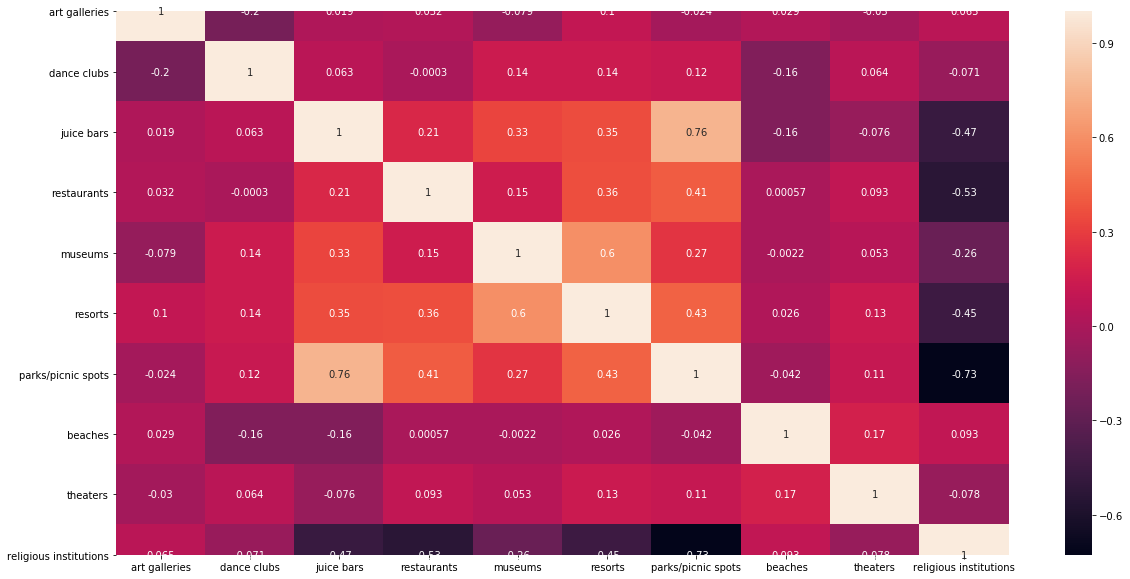

In [44]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [45]:
# we can see that some columns have significant correlation among themselves 


In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(random_state=42)

In [48]:
pca.fit(X_scaled)

PCA(random_state=42)

In [49]:
pca.components_[0]

array([-0.01468124,  0.10576915,  0.41118474,  0.32909362,  0.31536331,
        0.40326555,  0.48228555, -0.05683474,  0.07123616, -0.45633387])

In [50]:
pca.explained_variance_ratio_

array([0.31939189, 0.13086157, 0.12379616, 0.10540534, 0.08715564,
       0.08078176, 0.06901419, 0.03824274, 0.0315682 , 0.01378252])

In [51]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.31939189, 0.45025346, 0.57404961, 0.67945495, 0.76661059,
       0.84739235, 0.91640654, 0.95464928, 0.98621748, 1.        ])

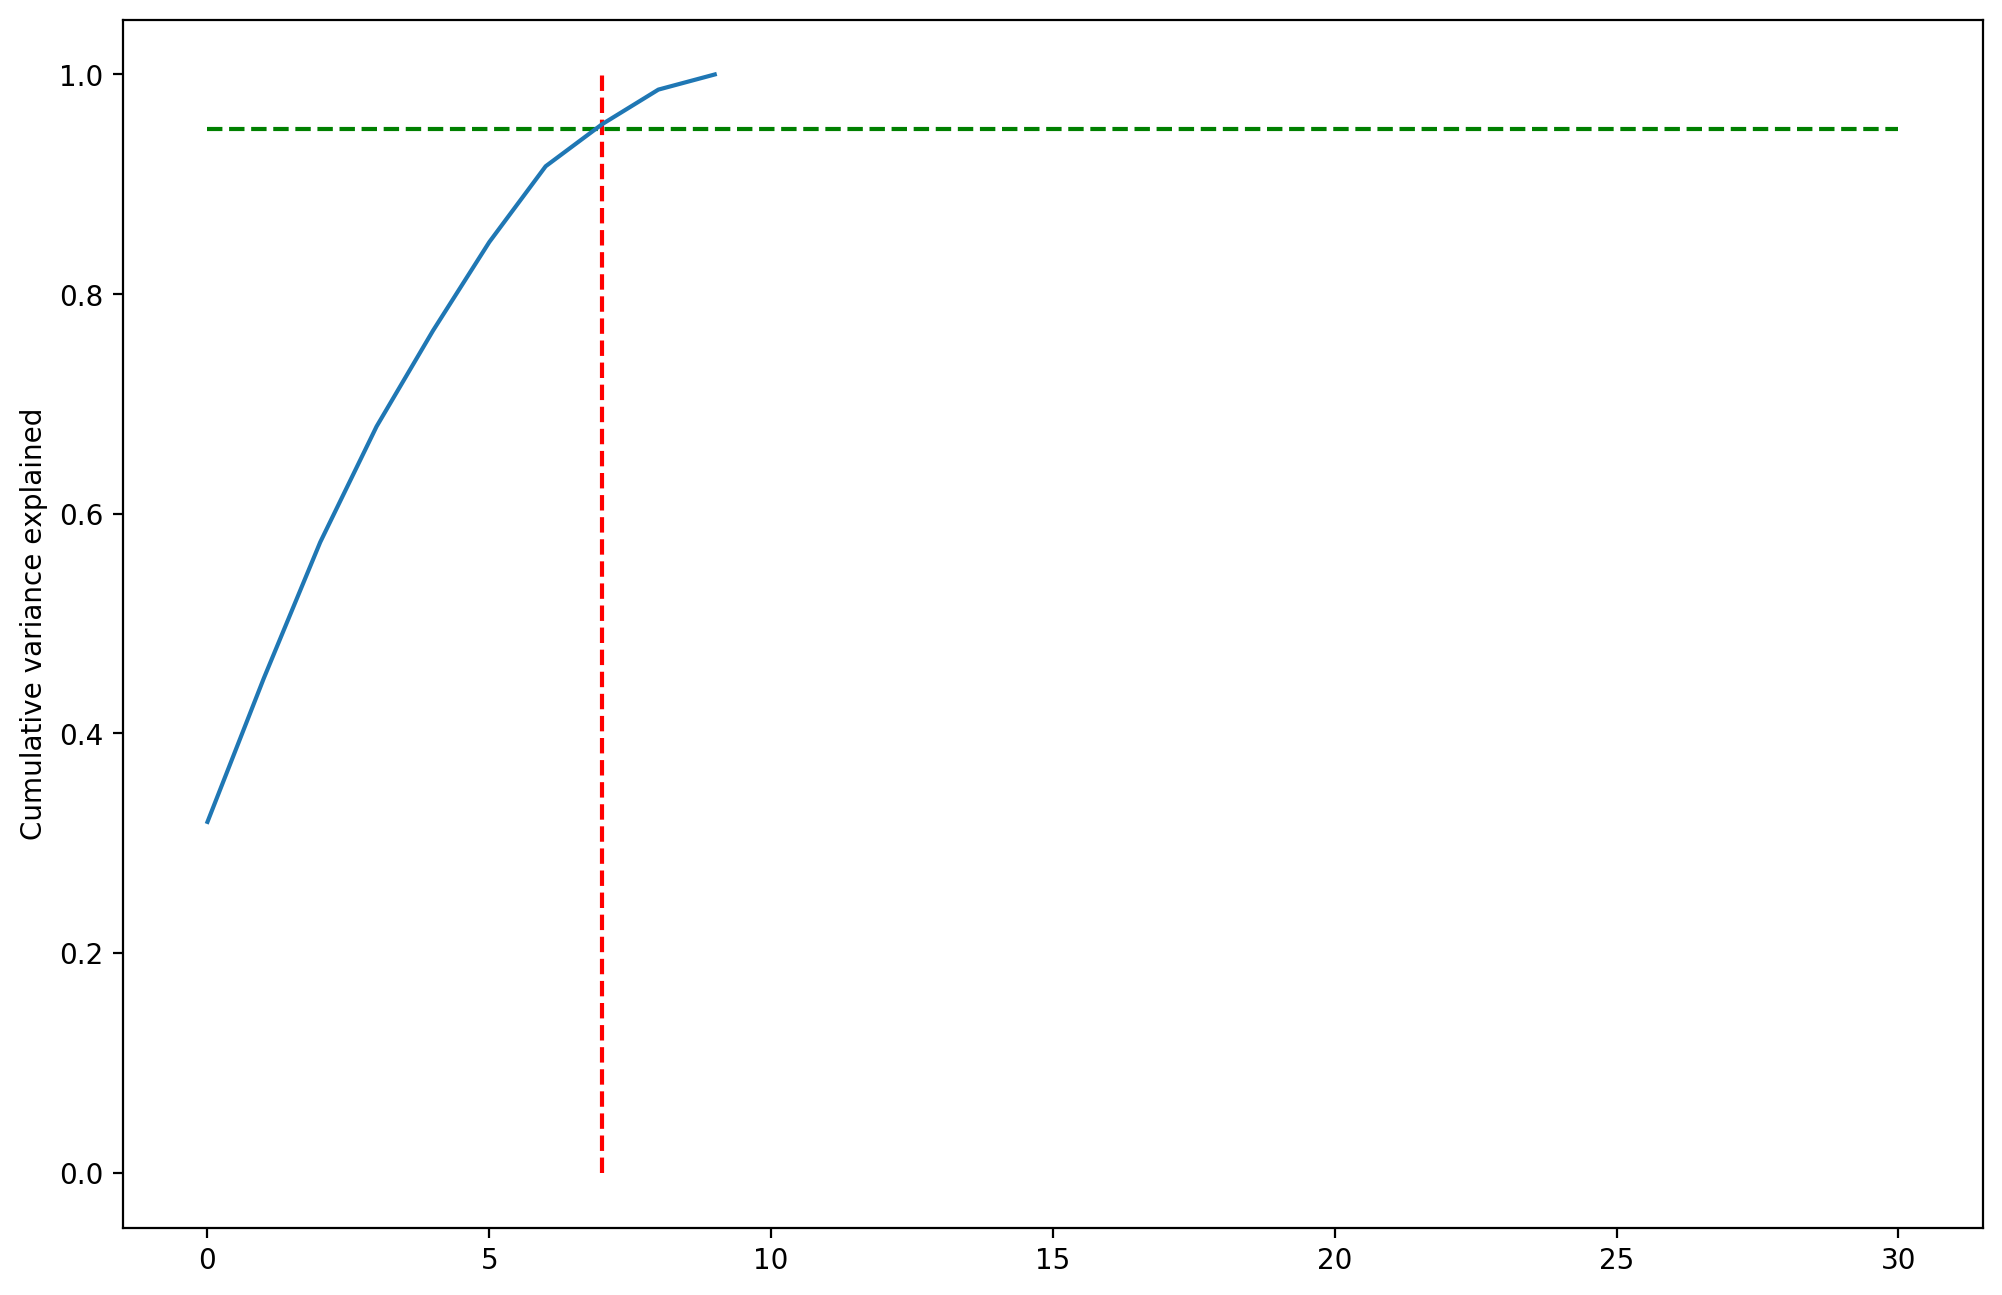

In [53]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=7, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [54]:
from sklearn.decomposition import IncrementalPCA

In [67]:
pca_final = IncrementalPCA(n_components=7)

In [68]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [69]:
print(X.shape)
print(X_pca_final.shape)


(900, 10)
(900, 7)


In [70]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [71]:
corrmat.shape

(7, 7)

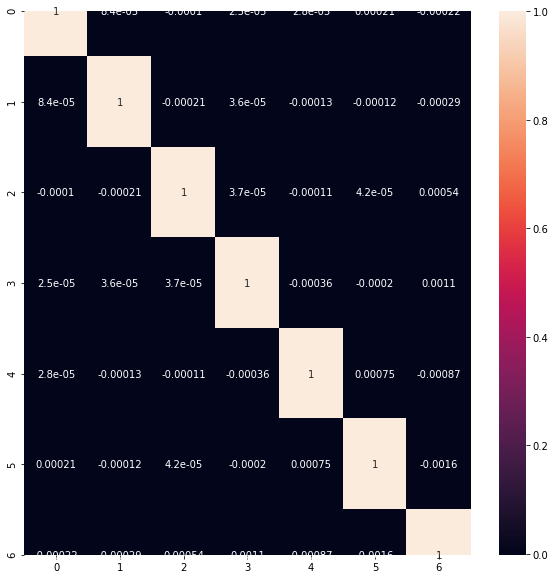

In [72]:
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [74]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

In [75]:
kmeans.labels_

array([0, 1, 4, 2, 3, 3, 4, 2, 4, 2, 0, 0, 0, 0, 3, 0, 2, 0, 3, 3, 3, 4,
       2, 0, 2, 4, 0, 0, 0, 0, 2, 4, 4, 4, 4, 0, 1, 3, 3, 3, 4, 2, 1, 4,
       3, 0, 3, 4, 1, 3, 3, 0, 4, 0, 2, 0, 4, 4, 1, 1, 3, 1, 3, 4, 1, 0,
       4, 3, 0, 1, 0, 3, 3, 4, 1, 3, 2, 3, 4, 1, 4, 0, 0, 0, 1, 0, 1, 0,
       2, 4, 0, 4, 1, 0, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 0, 4, 4, 3, 2, 2,
       0, 2, 4, 3, 2, 3, 4, 1, 2, 2, 2, 4, 2, 0, 2, 3, 4, 3, 4, 3, 4, 4,
       2, 2, 2, 2, 1, 4, 4, 4, 4, 4, 2, 0, 3, 4, 4, 2, 4, 3, 4, 0, 4, 0,
       4, 2, 4, 3, 1, 2, 3, 4, 4, 4, 2, 2, 1, 0, 4, 2, 1, 2, 3, 0, 0, 1,
       3, 4, 3, 3, 0, 4, 0, 4, 0, 4, 1, 4, 4, 4, 1, 3, 3, 0, 4, 4, 3, 0,
       3, 4, 2, 2, 2, 1, 0, 4, 0, 3, 3, 0, 4, 0, 3, 4, 4, 1, 2, 2, 0, 0,
       4, 4, 4, 1, 3, 4, 2, 4, 0, 0, 4, 4, 3, 0, 2, 2, 1, 2, 3, 0, 0, 0,
       4, 2, 3, 4, 0, 0, 3, 0, 2, 3, 2, 1, 2, 0, 2, 4, 4, 3, 3, 0, 3, 3,
       4, 2, 4, 1, 1, 2, 4, 0, 0, 4, 2, 4, 2, 1, 0, 4, 4, 4, 2, 2, 1, 0,
       3, 0, 3, 1, 4, 4, 4, 0, 0, 2, 1, 2, 0, 1, 2,

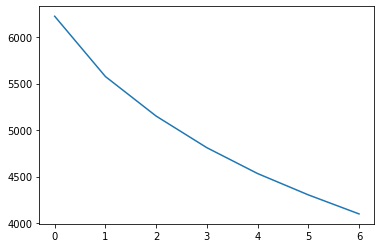

In [76]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [79]:
# from the elbow method we can say that k = 2 clusters seems to be a good choice

In [78]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.22634870707025123
For n_clusters=3, the silhouette score is 0.16595080129557208
For n_clusters=4, the silhouette score is 0.1443673550853479
For n_clusters=5, the silhouette score is 0.14438139465878327
For n_clusters=6, the silhouette score is 0.1367225679608412
For n_clusters=7, the silhouette score is 0.1417883286761368
For n_clusters=8, the silhouette score is 0.14512234678365782


In [81]:
# final model with k=2
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=2, random_state=42)

In [82]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [83]:
data_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

In [84]:
data_outliers_removed.head()

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions,K-Means_Cluster_ID
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,0
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,0
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66,0


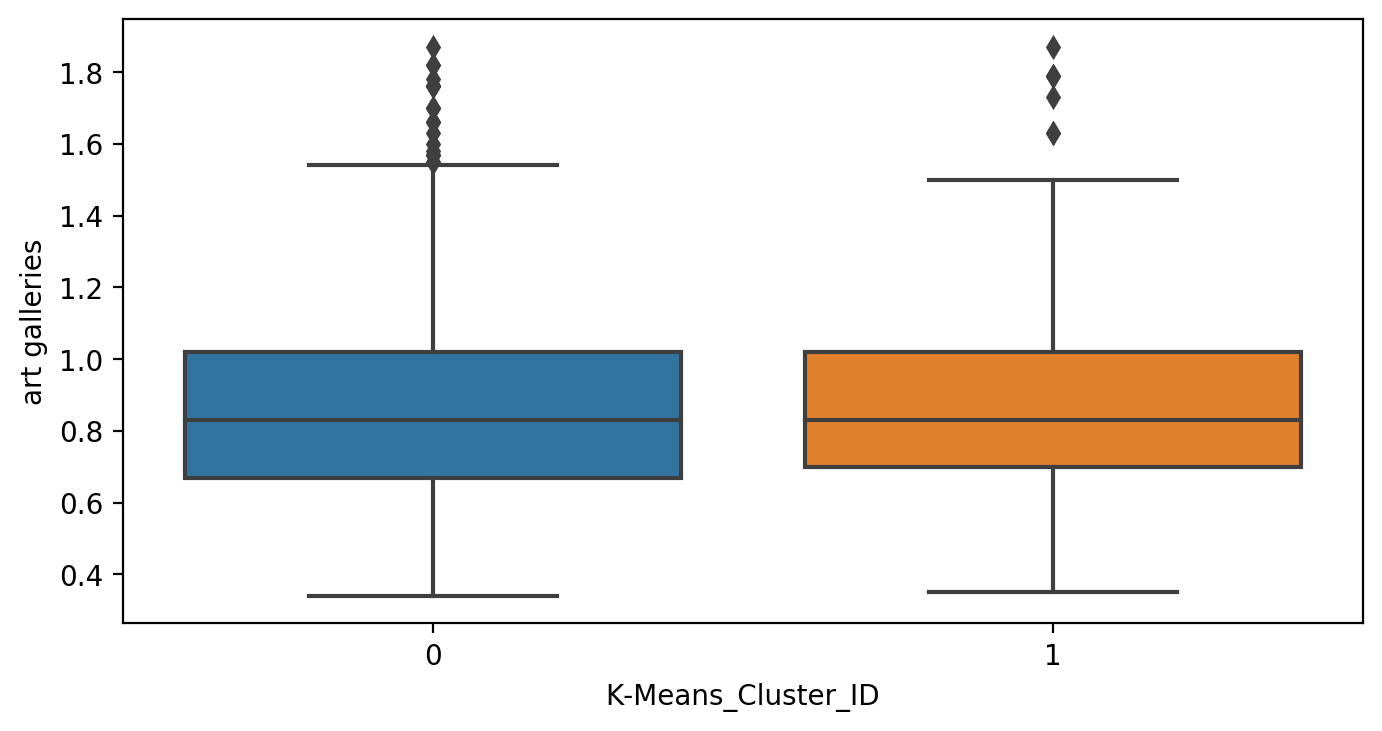

In [86]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='art galleries', data=data_outliers_removed)

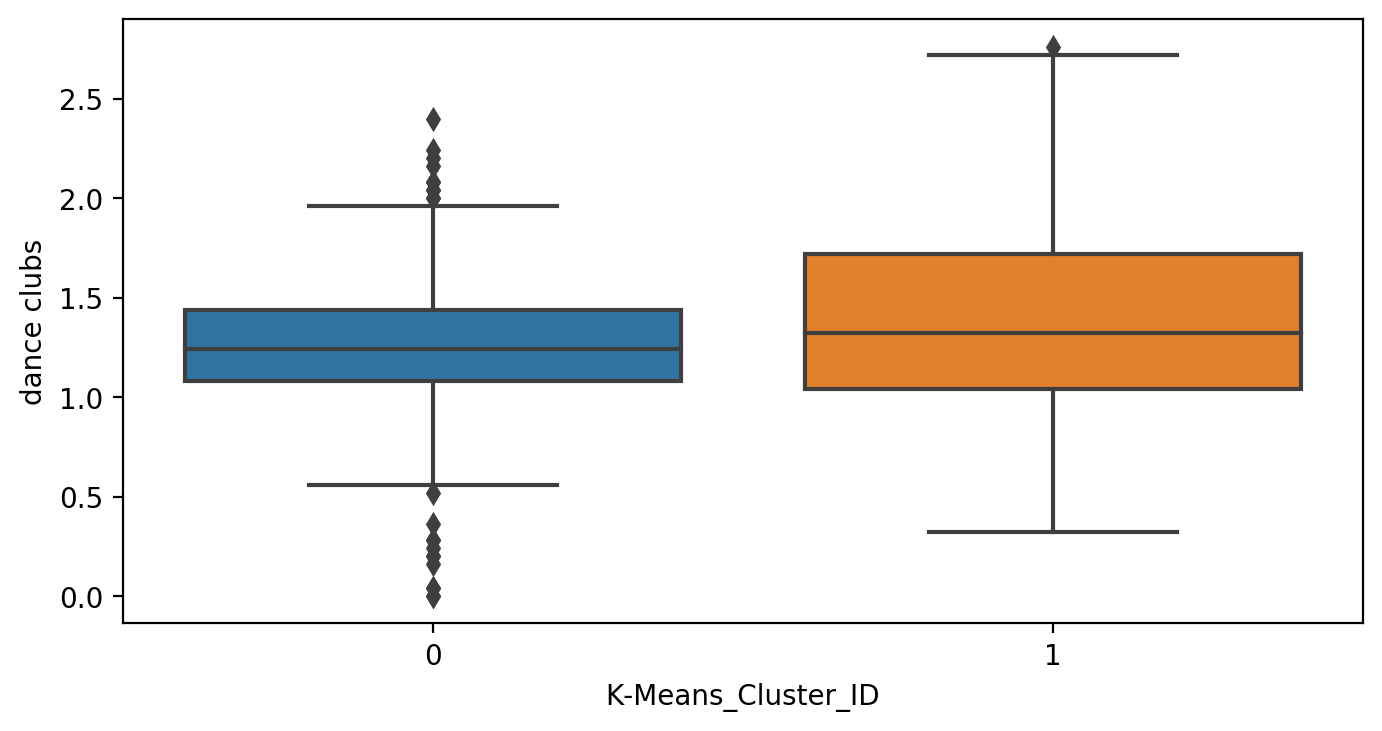

In [87]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='dance clubs', data=data_outliers_removed)

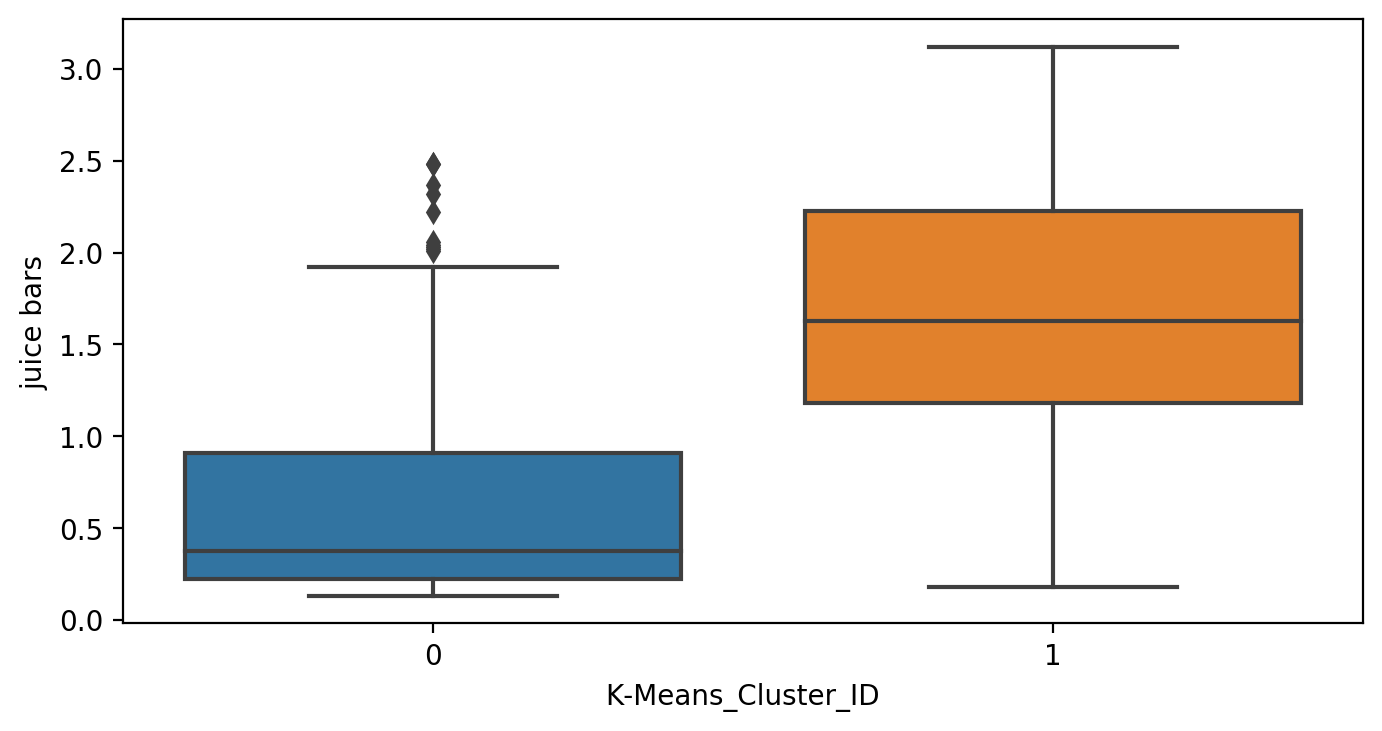

In [88]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='juice bars', data=data_outliers_removed)

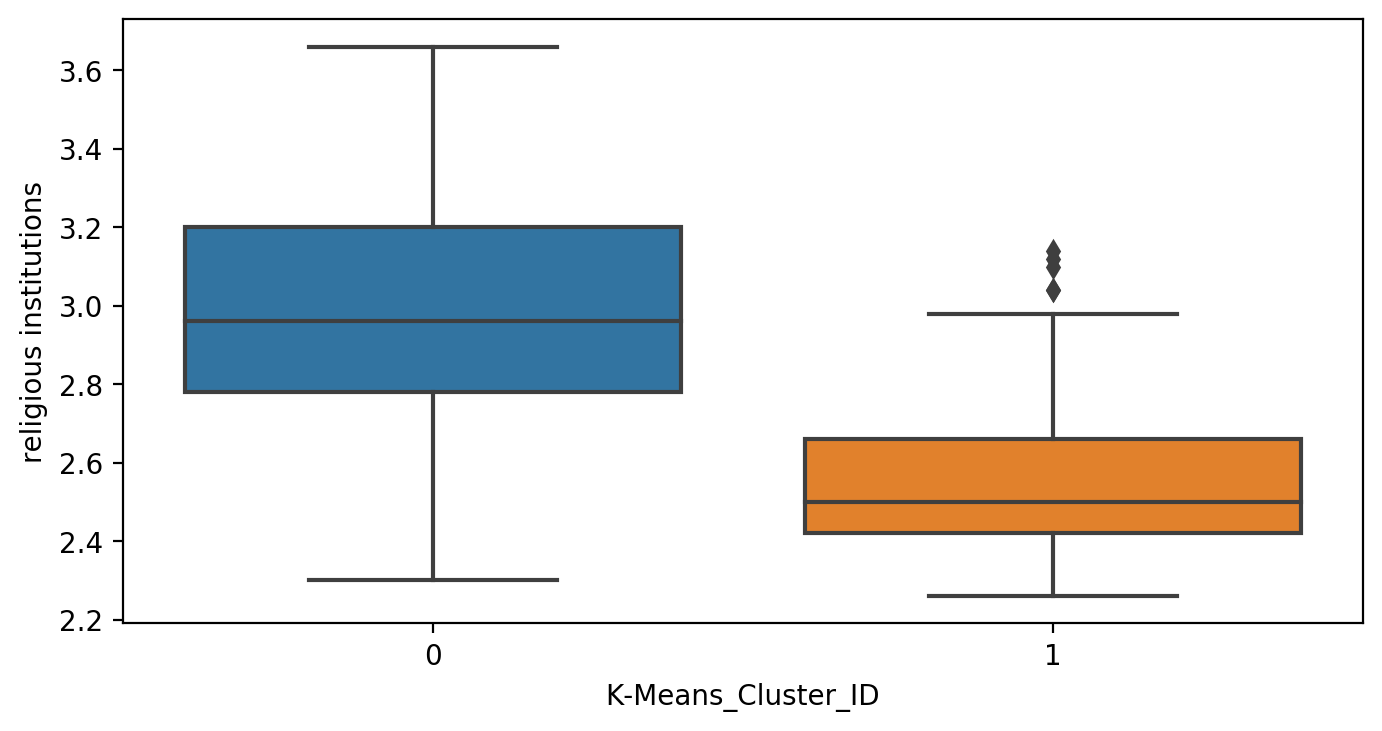

In [89]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='religious institutions', data=data_outliers_removed)

# Hierarchical Clustering

In [90]:
X_scaled_df.head()

,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,0.202779,1.195742,1.606027,0.866767,-0.305195,1.114414,1.164213,-0.334675,0.797025,-1.200847
1,1.234462,-1.275026,-0.620032,0.223718,-1.706093,-0.552755,-0.116706,-0.258265,-0.720393,-0.950294
2,-1.504834,1.195742,-0.938040,0.509517,-1.155740,-0.590645,-0.116706,0.964292,0.053192,0.177197
3,-1.291383,-0.286719,0.194070,0.509517,1.545990,0.356610,-0.116706,-0.411085,-1.107186,-0.825017
4,0.416231,-0.089057,-0.391066,-1.633981,-0.455292,-1.083218,-1.397624,0.429423,0.320972,2.682732


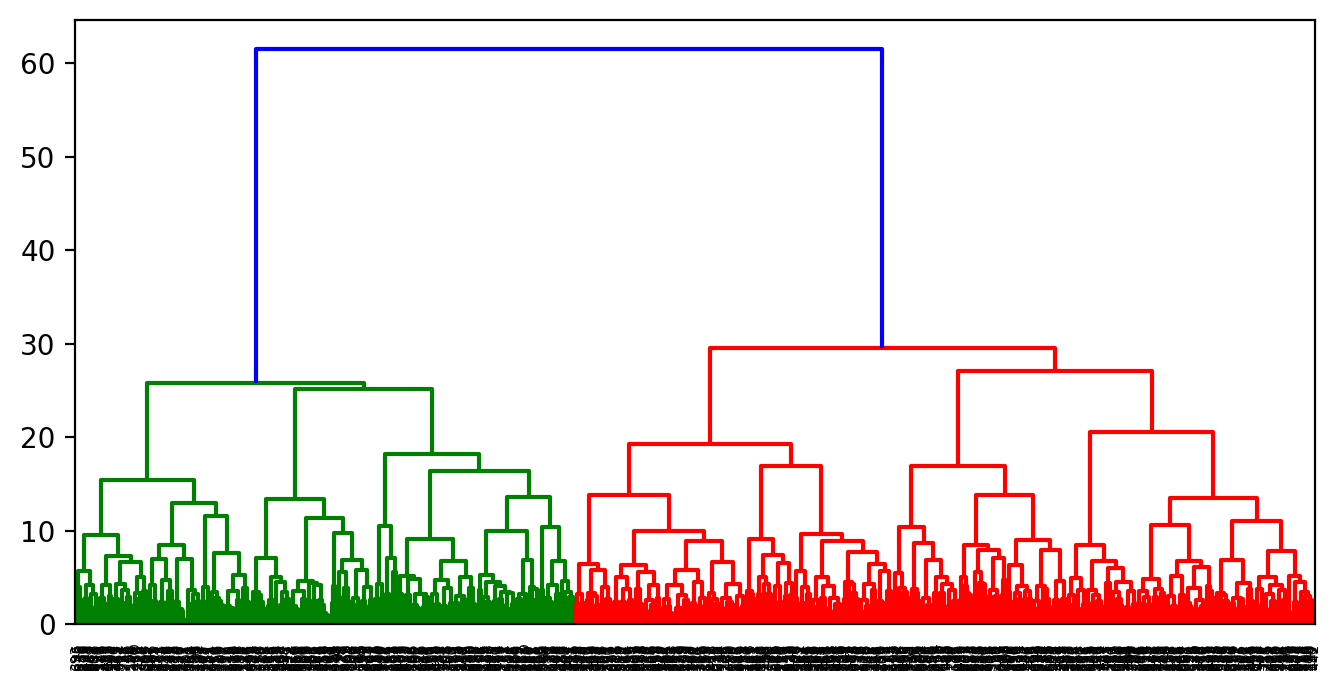

In [93]:
# ward linkage
plt.figure(figsize=(8,4),dpi=200)
merging = linkage(X_scaled_df, method="ward", metric='euclidean')
dendrogram(merging)
plt.show()

In [95]:
cluster_labels = cut_tree(merging, n_clusters=2).reshape(-1, )

In [96]:
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [97]:
data_outliers_removed["Hierarchical_Cluster_labels"] = cluster_labels


In [98]:
data_outliers_removed.head()

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1,0
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,0,1
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,0,1
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1,0
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66,0,1


In [100]:
data_outliers_removed.columns

Index(['User ID', 'art galleries', 'dance clubs', 'juice bars', 'restaurants',
       'museums', 'resorts', 'parks/picnic spots', ' beaches', 'theaters',
       'religious institutions', 'K-Means_Cluster_ID',
       'Hierarchical_Cluster_labels'],
      dtype='object')

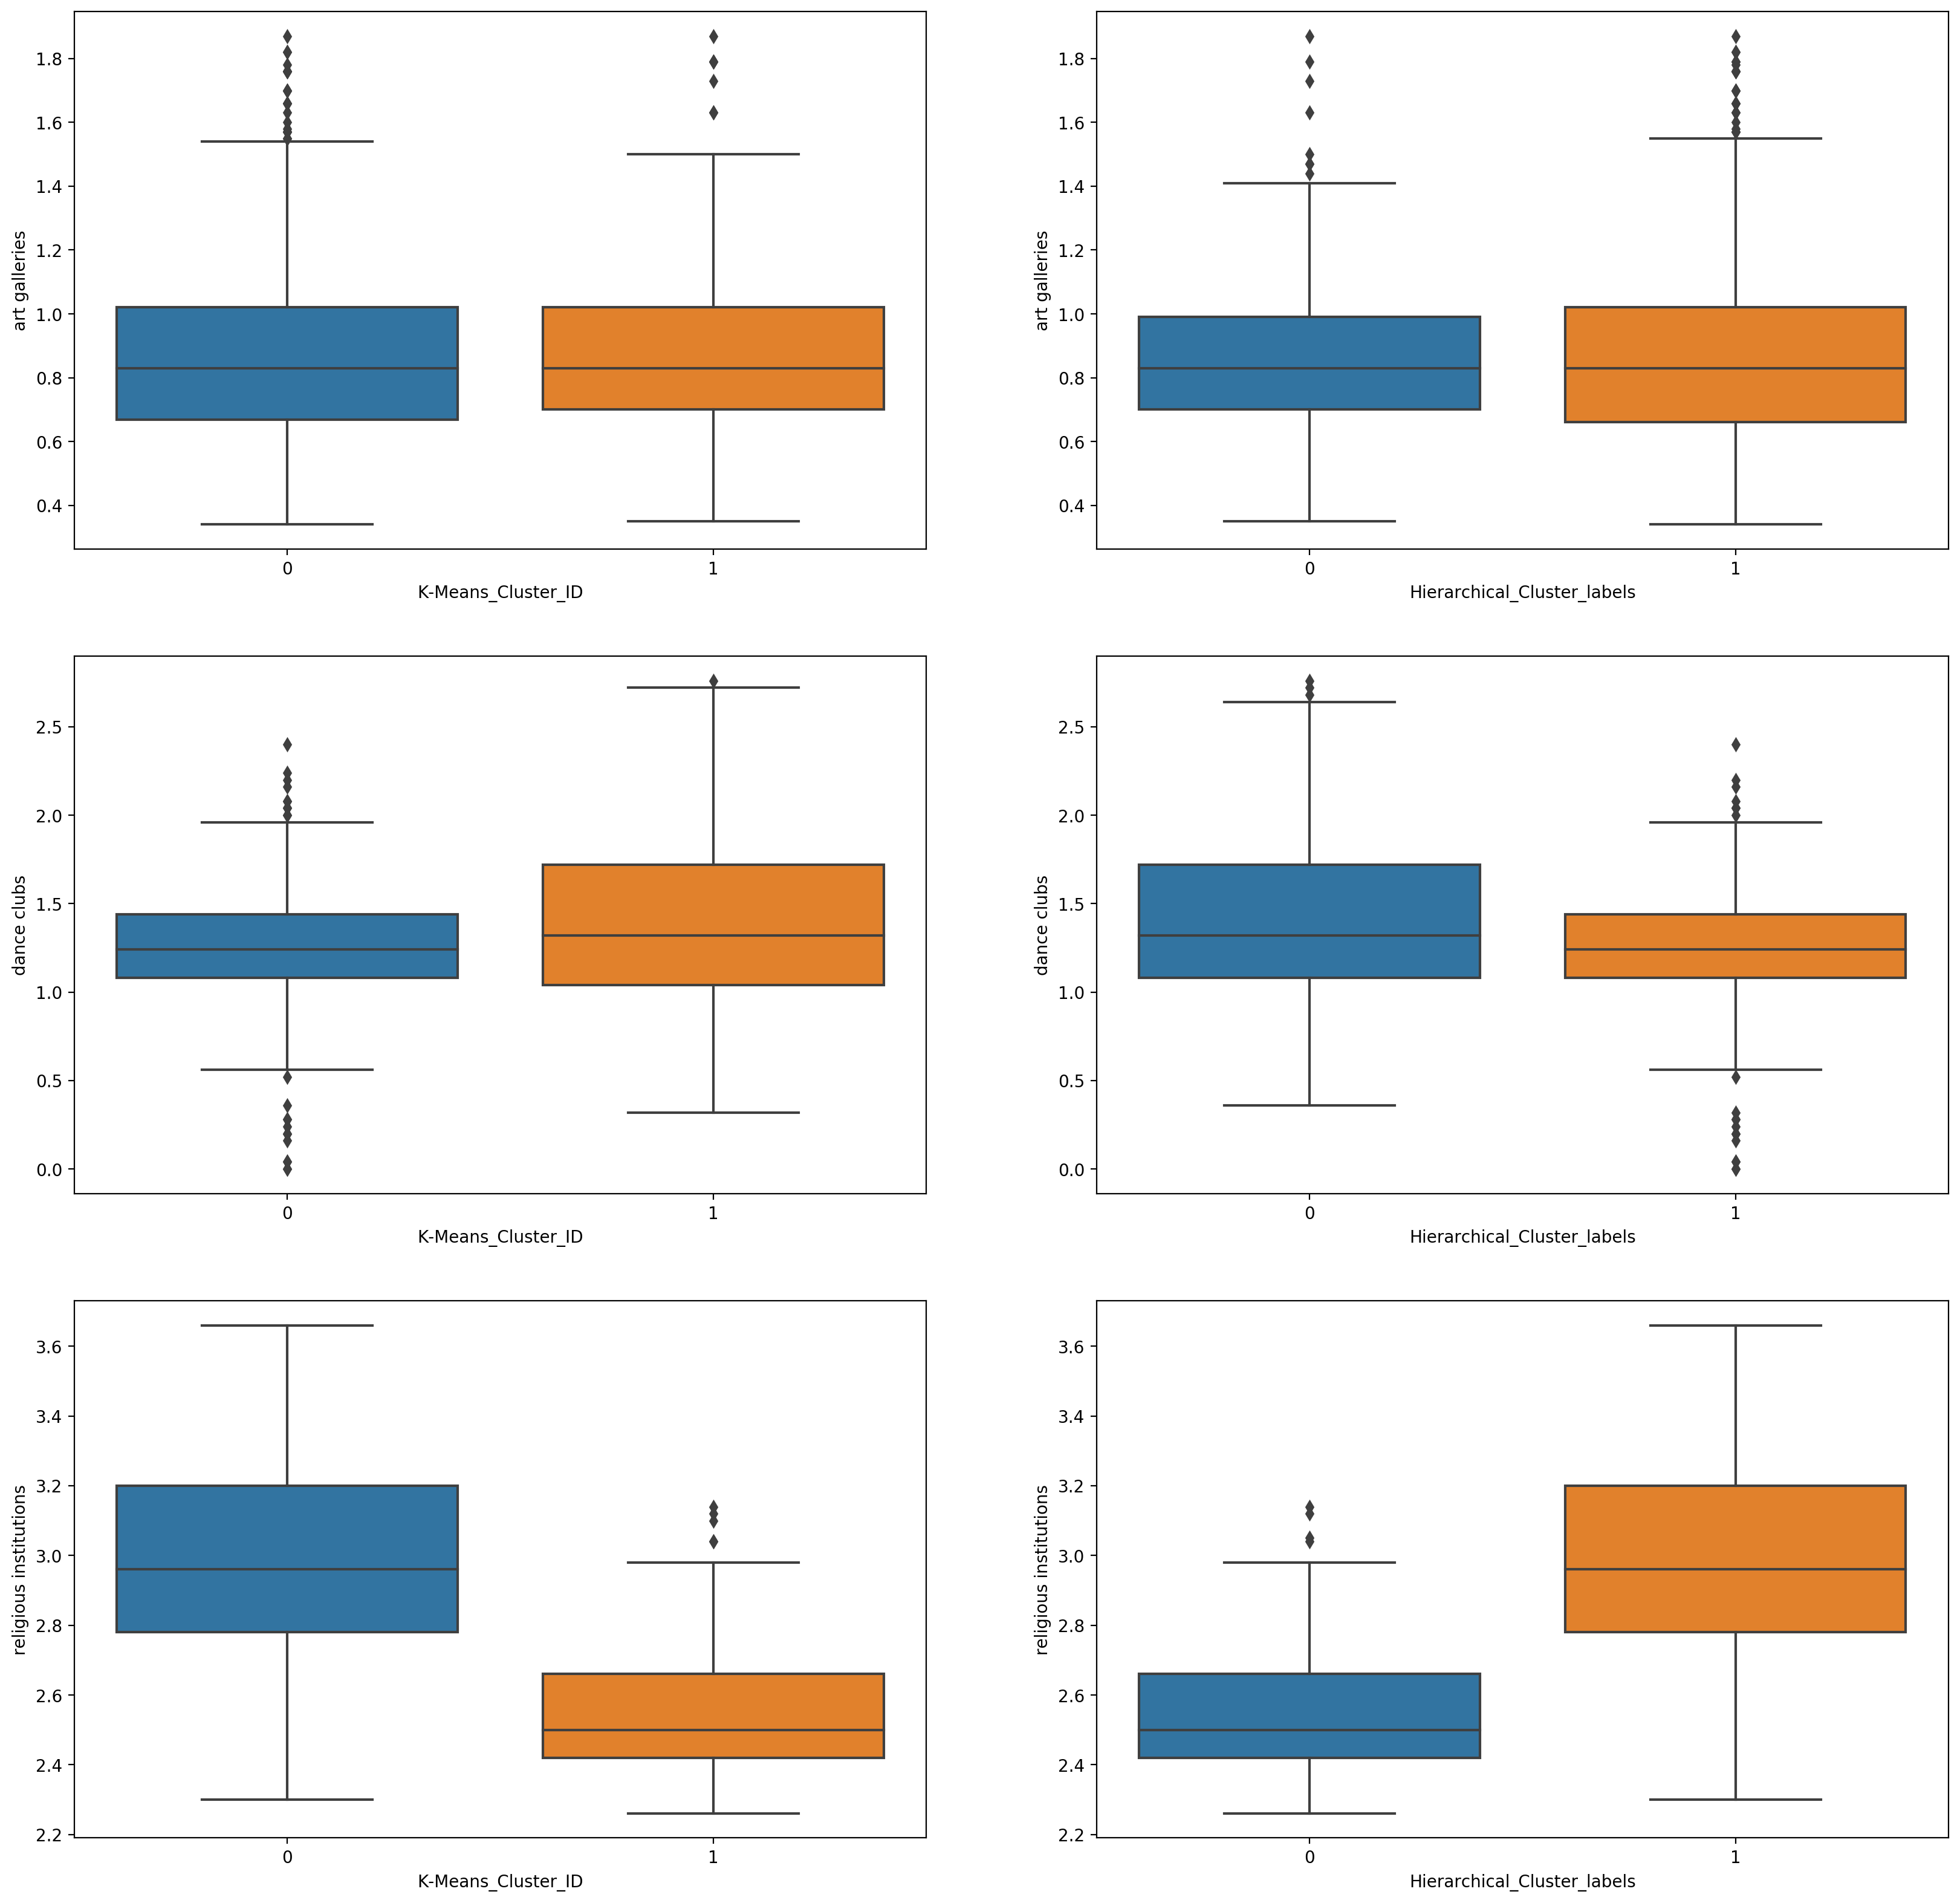

In [103]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='art galleries', data=data_outliers_removed)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='art galleries', data=data_outliers_removed)

plt.subplot(3,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='dance clubs', data=data_outliers_removed)

plt.subplot(3,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='dance clubs', data=data_outliers_removed)

plt.subplot(3,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='religious institutions', data=data_outliers_removed)

plt.subplot(3,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='religious institutions', data=data_outliers_removed)

In [104]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [105]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.607234,-0.278356,0.097601,-0.686122,0.902475,-0.745053,0.514762
1,-0.753548,0.785917,-2.201586,-0.833335,0.570468,0.458166,0.049117
2,-0.860017,-0.356203,1.259005,-1.733810,-0.316237,0.650657,1.156112
3,1.132012,-0.913501,0.183144,0.520289,-1.167471,1.485931,-0.598339
4,-3.195333,0.083882,0.444020,0.935397,-0.117205,-1.282349,0.042214


In [107]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = cluster_labels

In [108]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,2.607234,-0.278356,0.097601,-0.686122,0.902475,-0.745053,0.514762,1,0
1,-0.753548,0.785917,-2.201586,-0.833335,0.570468,0.458166,0.049117,0,1
2,-0.860017,-0.356203,1.259005,-1.733810,-0.316237,0.650657,1.156112,0,1
3,1.132012,-0.913501,0.183144,0.520289,-1.167471,1.485931,-0.598339,1,0
4,-3.195333,0.083882,0.444020,0.935397,-0.117205,-1.282349,0.042214,0,1


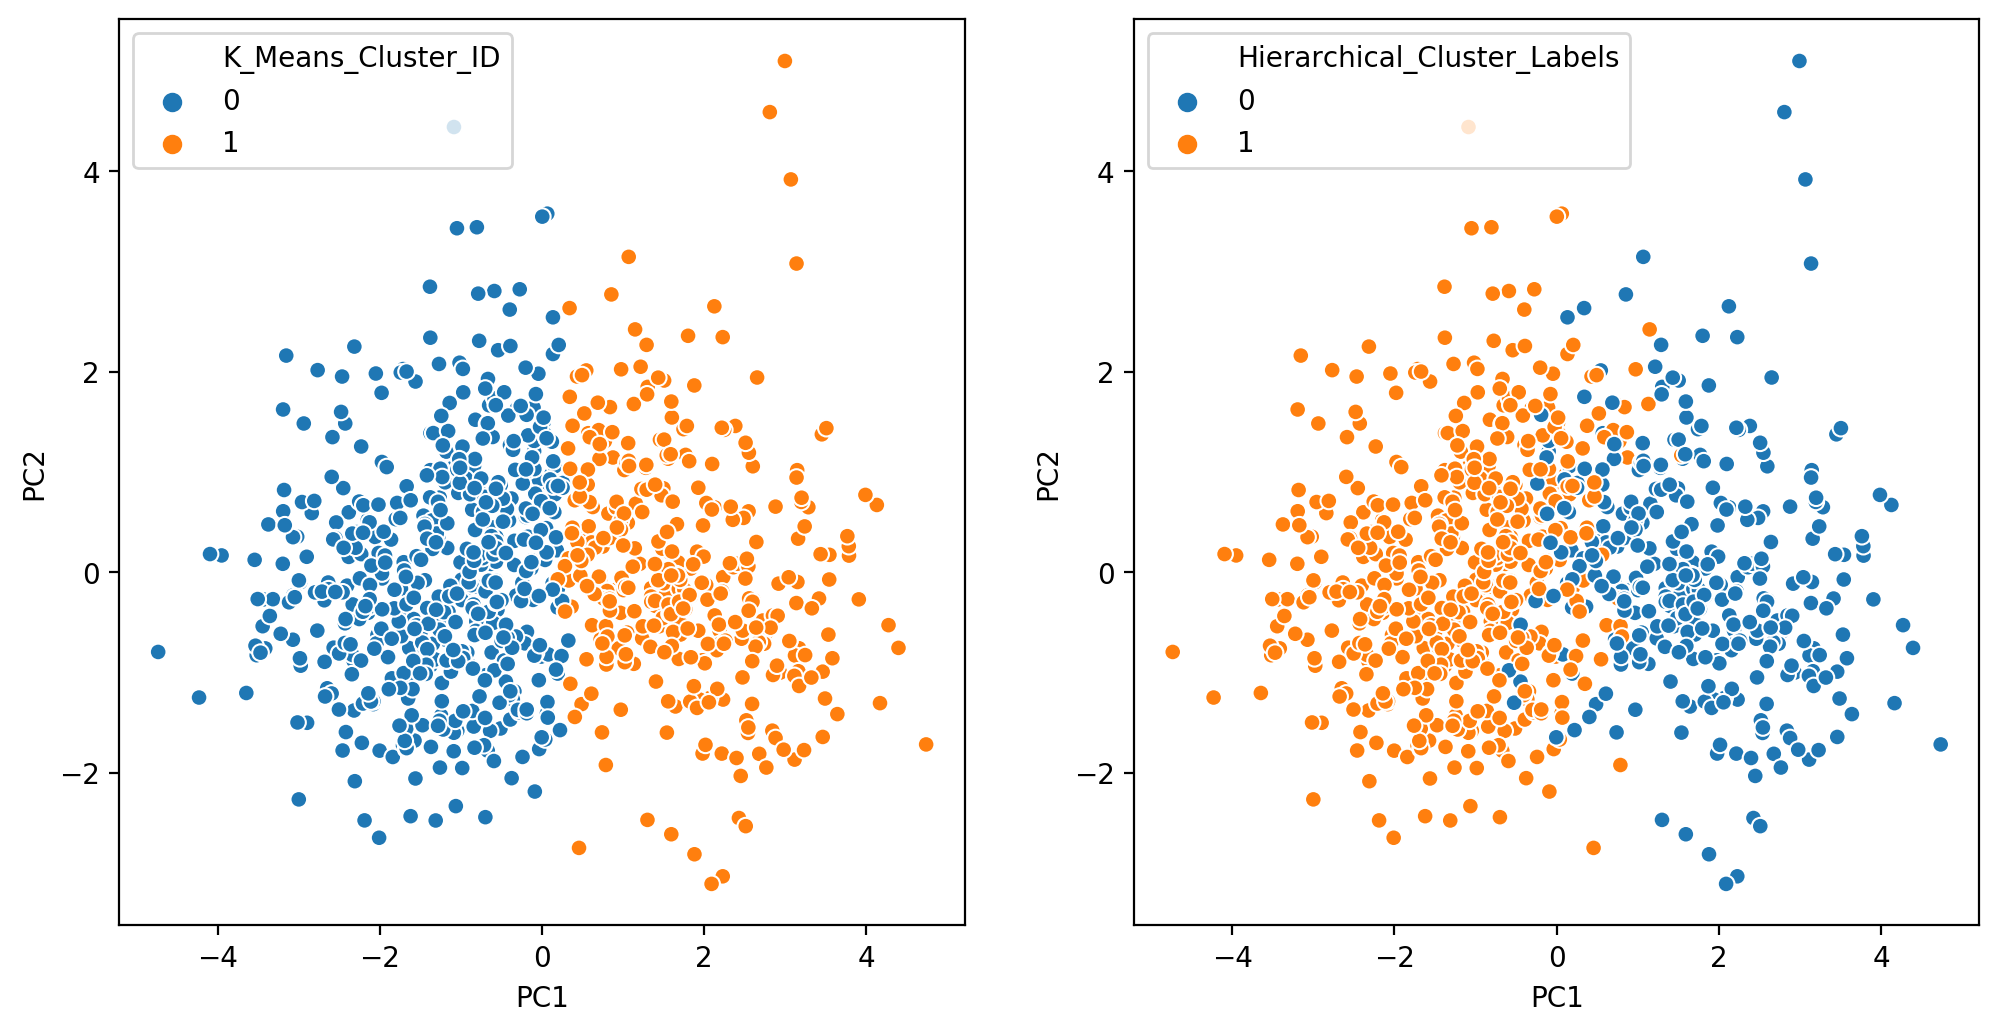

In [109]:
# scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')

In [110]:
data_outliers_removed.columns

Index(['User ID', 'art galleries', 'dance clubs', 'juice bars', 'restaurants',
       'museums', 'resorts', 'parks/picnic spots', ' beaches', 'theaters',
       'religious institutions', 'K-Means_Cluster_ID',
       'Hierarchical_Cluster_labels'],
      dtype='object')

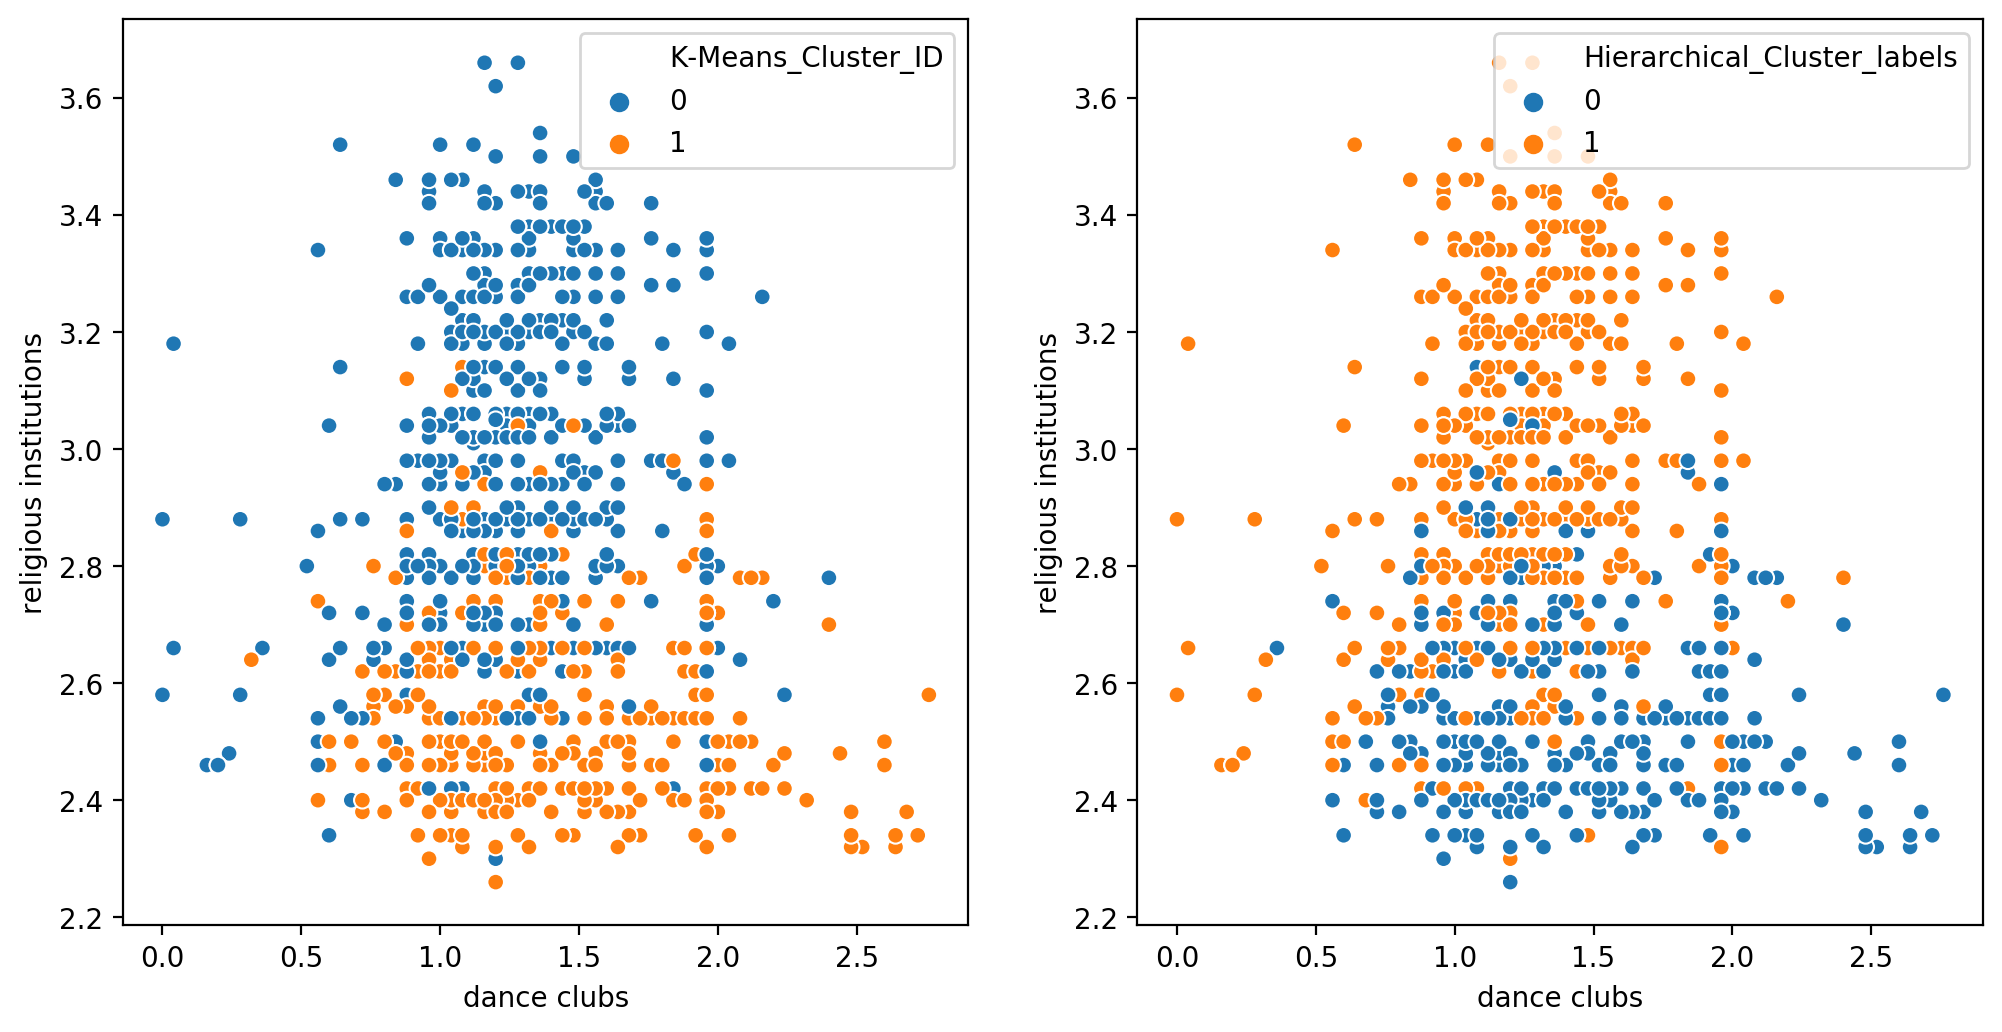

In [112]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='dance clubs',y='religious institutions',data=data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='dance clubs',y='religious institutions',data=data_outliers_removed,hue='Hierarchical_Cluster_labels')

People who go to religious institutions rate dance clubs low

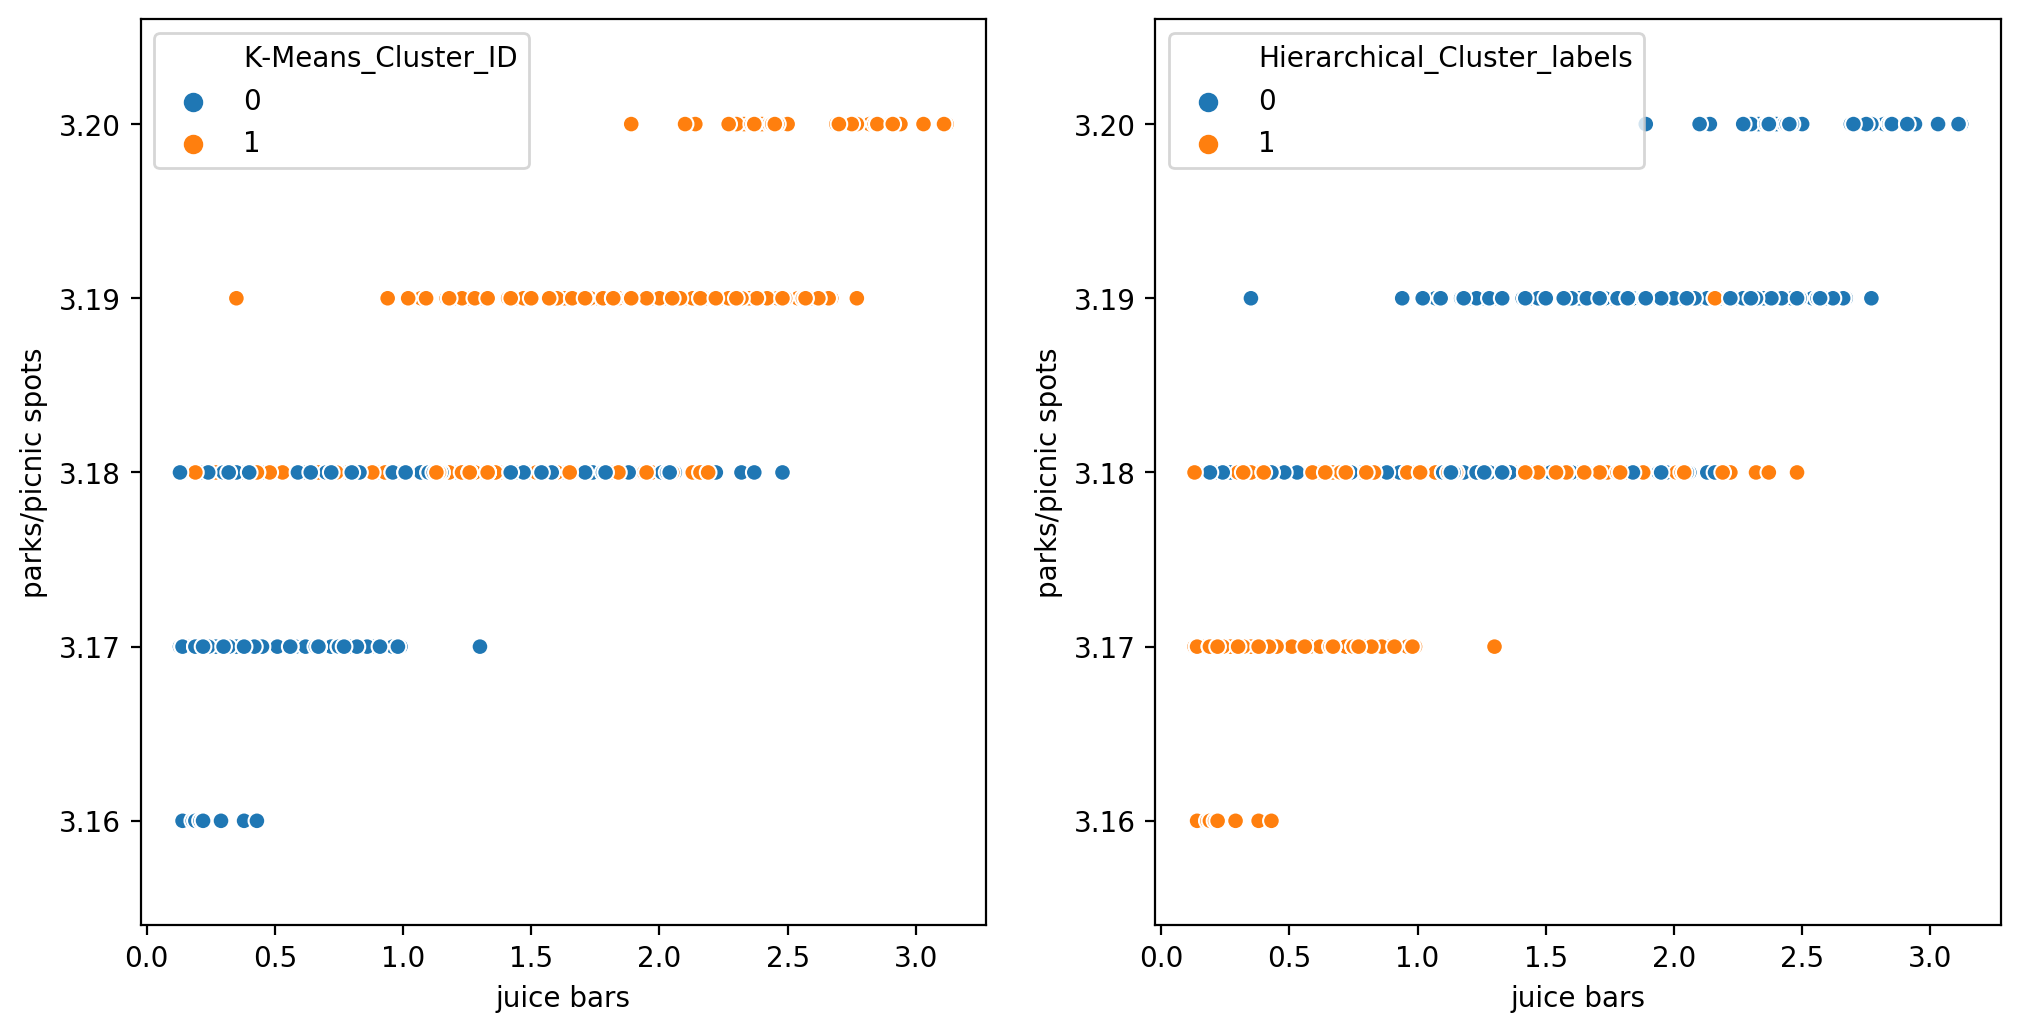

In [113]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='juice bars',y='parks/picnic spots',data=data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='juice bars',y='parks/picnic spots',data=data_outliers_removed,hue='Hierarchical_Cluster_labels')

People who go parks do go to juics shop

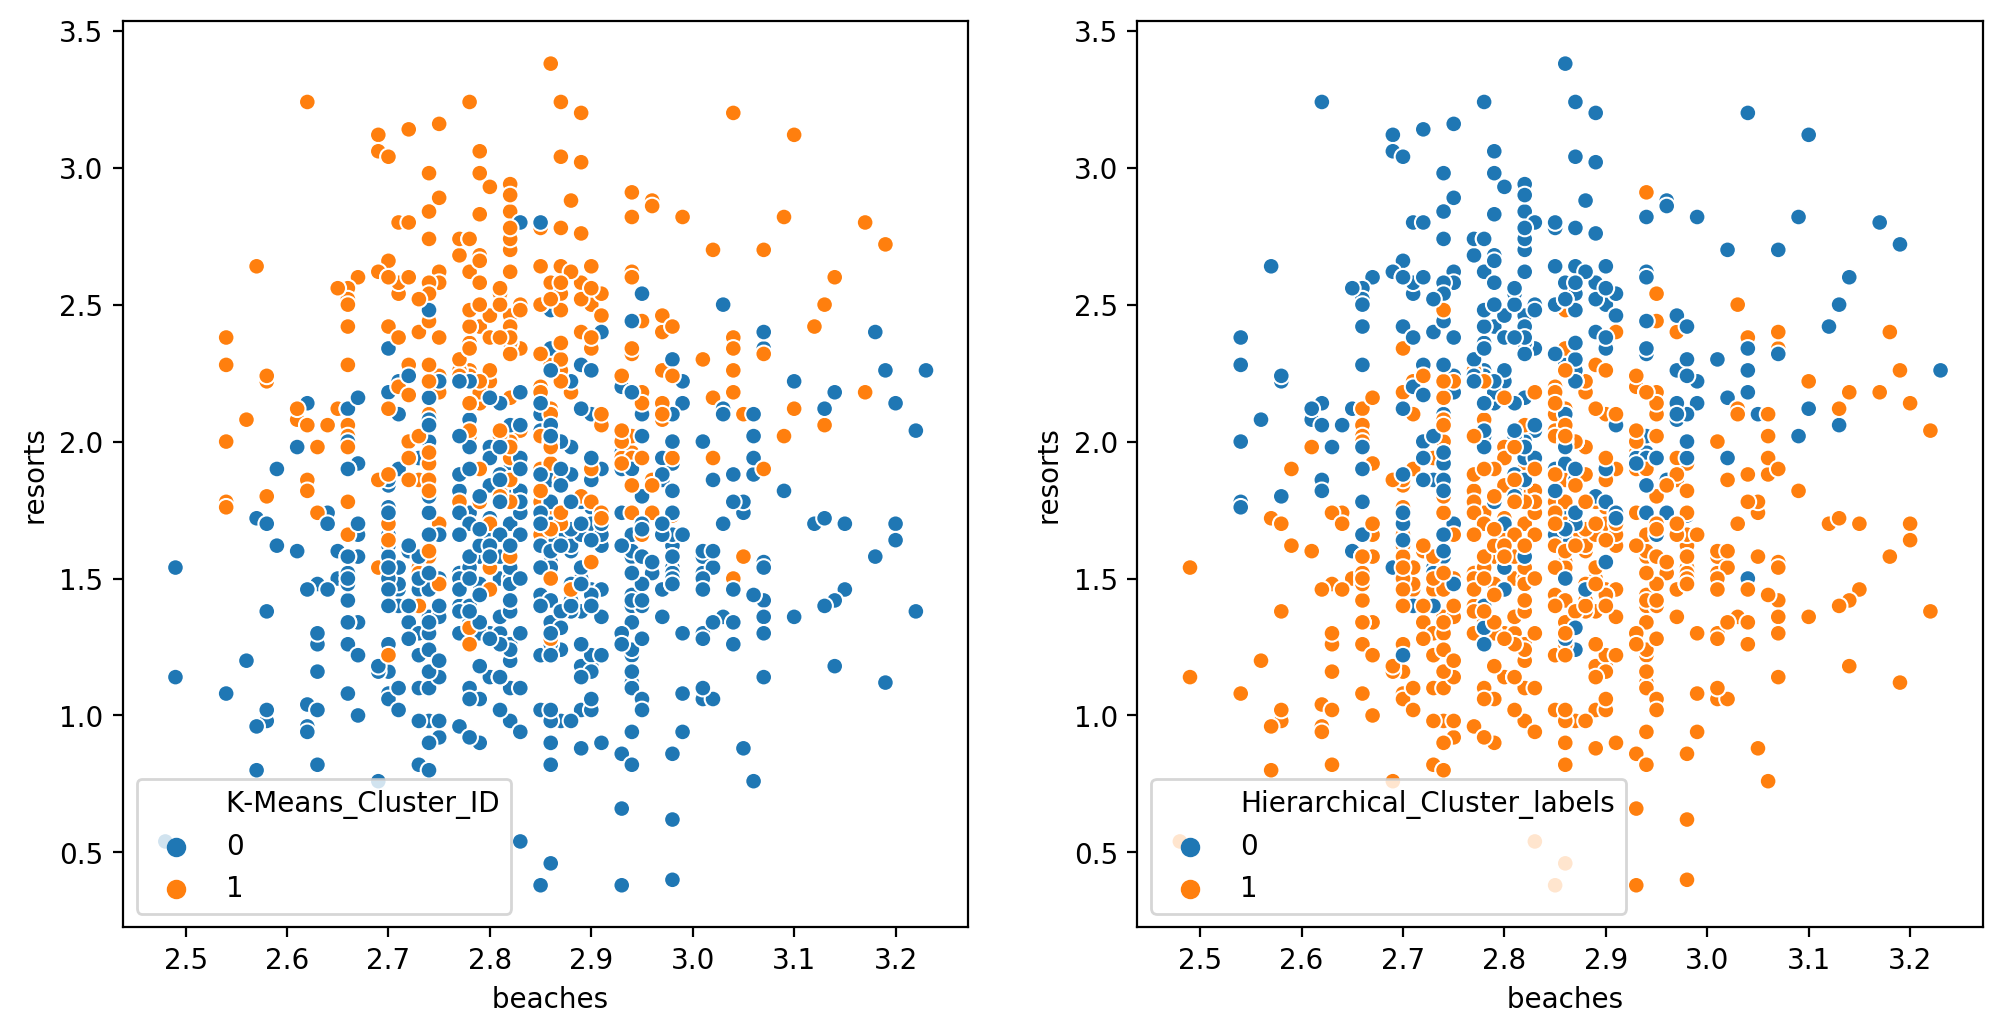

In [114]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x=' beaches',y='resorts',data=data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x=' beaches',y='resorts',data=data_outliers_removed,hue='Hierarchical_Cluster_labels')

In [116]:
K_Means_avg_rating = data_outliers_removed[data_outliers_removed['K-Means_Cluster_ID'] == 1]
K_Means_avg_rating

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1,0
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1,0
8,User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54,1,0
10,User 11,1.47,1.00,0.70,0.75,1.66,2.76,3.18,2.89,1.66,2.62,1,0
12,User 13,0.74,1.44,2.75,0.45,0.98,1.74,3.20,2.87,1.38,2.34,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,User 965,1.25,1.24,0.43,0.62,0.72,2.70,3.18,3.07,1.82,2.80,1,0
966,User 967,0.91,1.96,1.82,0.40,1.52,1.82,3.19,2.74,1.73,2.38,1,0
973,User 974,0.38,1.96,0.19,0.48,1.14,2.14,3.18,2.78,1.54,2.58,1,0
974,User 975,1.02,2.44,1.89,0.47,1.76,2.50,3.19,2.66,1.73,2.48,1,0


In [117]:
Hirarchical_avg_rating = data_outliers_removed[data_outliers_removed['Hierarchical_Cluster_labels'] == 0]
Hirarchical_avg_rating

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1,0
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1,0
8,User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54,1,0
10,User 11,1.47,1.00,0.70,0.75,1.66,2.76,3.18,2.89,1.66,2.62,1,0
12,User 13,0.74,1.44,2.75,0.45,0.98,1.74,3.20,2.87,1.38,2.34,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,User 969,0.51,1.20,0.22,0.73,0.90,2.22,3.18,2.77,1.34,3.05,0,0
970,User 971,0.58,1.96,0.24,0.47,1.04,1.74,3.18,2.70,1.57,2.62,0,0
973,User 974,0.38,1.96,0.19,0.48,1.14,2.14,3.18,2.78,1.54,2.58,1,0
974,User 975,1.02,2.44,1.89,0.47,1.76,2.50,3.19,2.66,1.73,2.48,1,0


In [118]:
len(Hirarchical_avg_rating)

363

In [119]:
len(K_Means_avg_rating)

368

In [120]:
data_outliers_removed.columns

Index(['User ID', 'art galleries', 'dance clubs', 'juice bars', 'restaurants',
       'museums', 'resorts', 'parks/picnic spots', ' beaches', 'theaters',
       'religious institutions', 'K-Means_Cluster_ID',
       'Hierarchical_Cluster_labels'],
      dtype='object')

In [122]:
common_user = pd.merge(K_Means_avg_rating,Hirarchical_avg_rating,how='inner',on=['User ID', 'art galleries', 'dance clubs', 'juice bars', 'restaurants',
       'museums', 'resorts', 'parks/picnic spots', ' beaches', 'theaters',
       'religious institutions', 'K-Means_Cluster_ID',
       'Hierarchical_Cluster_labels'])

In [124]:
common_user[['User ID', 'art galleries', 'dance clubs', 'juice bars', 'restaurants',
       'museums', 'resorts', 'parks/picnic spots', ' beaches', 'theaters',
       'religious institutions']]

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
2,User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54
3,User 11,1.47,1.00,0.70,0.75,1.66,2.76,3.18,2.89,1.66,2.62
4,User 13,0.74,1.44,2.75,0.45,0.98,1.74,3.20,2.87,1.38,2.34
...,...,...,...,...,...,...,...,...,...,...,...
329,User 965,1.25,1.24,0.43,0.62,0.72,2.70,3.18,3.07,1.82,2.80
330,User 967,0.91,1.96,1.82,0.40,1.52,1.82,3.19,2.74,1.73,2.38
331,User 974,0.38,1.96,0.19,0.48,1.14,2.14,3.18,2.78,1.54,2.58
332,User 975,1.02,2.44,1.89,0.47,1.76,2.50,3.19,2.66,1.73,2.48


In [125]:
len(common_user)

334

In [129]:
common_user_final = common_user[['User ID', 'art galleries', 'dance clubs', 'juice bars', 'restaurants',
       'museums', 'resorts', 'parks/picnic spots', ' beaches', 'theaters',
       'religious institutions']].sort_values(['parks/picnic spots'],ascending=[False])
common_user_final

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
142,User 410,0.64,1.72,2.40,0.61,1.60,2.46,3.20,2.91,2.53,2.34
34,User 106,0.86,0.88,2.85,0.39,0.42,1.54,3.20,2.73,1.70,2.46
120,User 349,0.67,1.08,2.90,0.48,1.10,1.94,3.20,2.94,1.15,2.32
297,User 886,0.90,1.40,2.45,0.64,0.82,1.56,3.20,2.90,1.60,2.56
171,User 514,0.77,1.88,2.43,0.65,1.06,3.12,3.20,2.69,2.11,2.40
...,...,...,...,...,...,...,...,...,...,...,...
87,User 260,0.61,1.32,1.62,0.72,1.68,1.78,3.18,2.54,1.31,2.42
222,User 668,1.25,1.04,1.58,0.67,0.88,2.42,3.18,2.70,1.34,2.90
224,User 683,0.83,0.96,1.47,0.50,1.46,2.02,3.18,2.94,1.22,2.50
84,User 251,0.51,1.00,1.57,0.56,1.58,1.82,3.18,2.81,1.22,2.66
